In [2]:
from setup_libs import *

In [3]:
import torch

## 7.3 Двуслойная (многослойная) нейронная сеть

Обозначения
* $x_i$ - вектор i-го объекта
* $x^j_i$ - j-ый элемент, i-го вектора (скаляр)
* $a^m$ - m-ый элемент выходного слоя нейронов

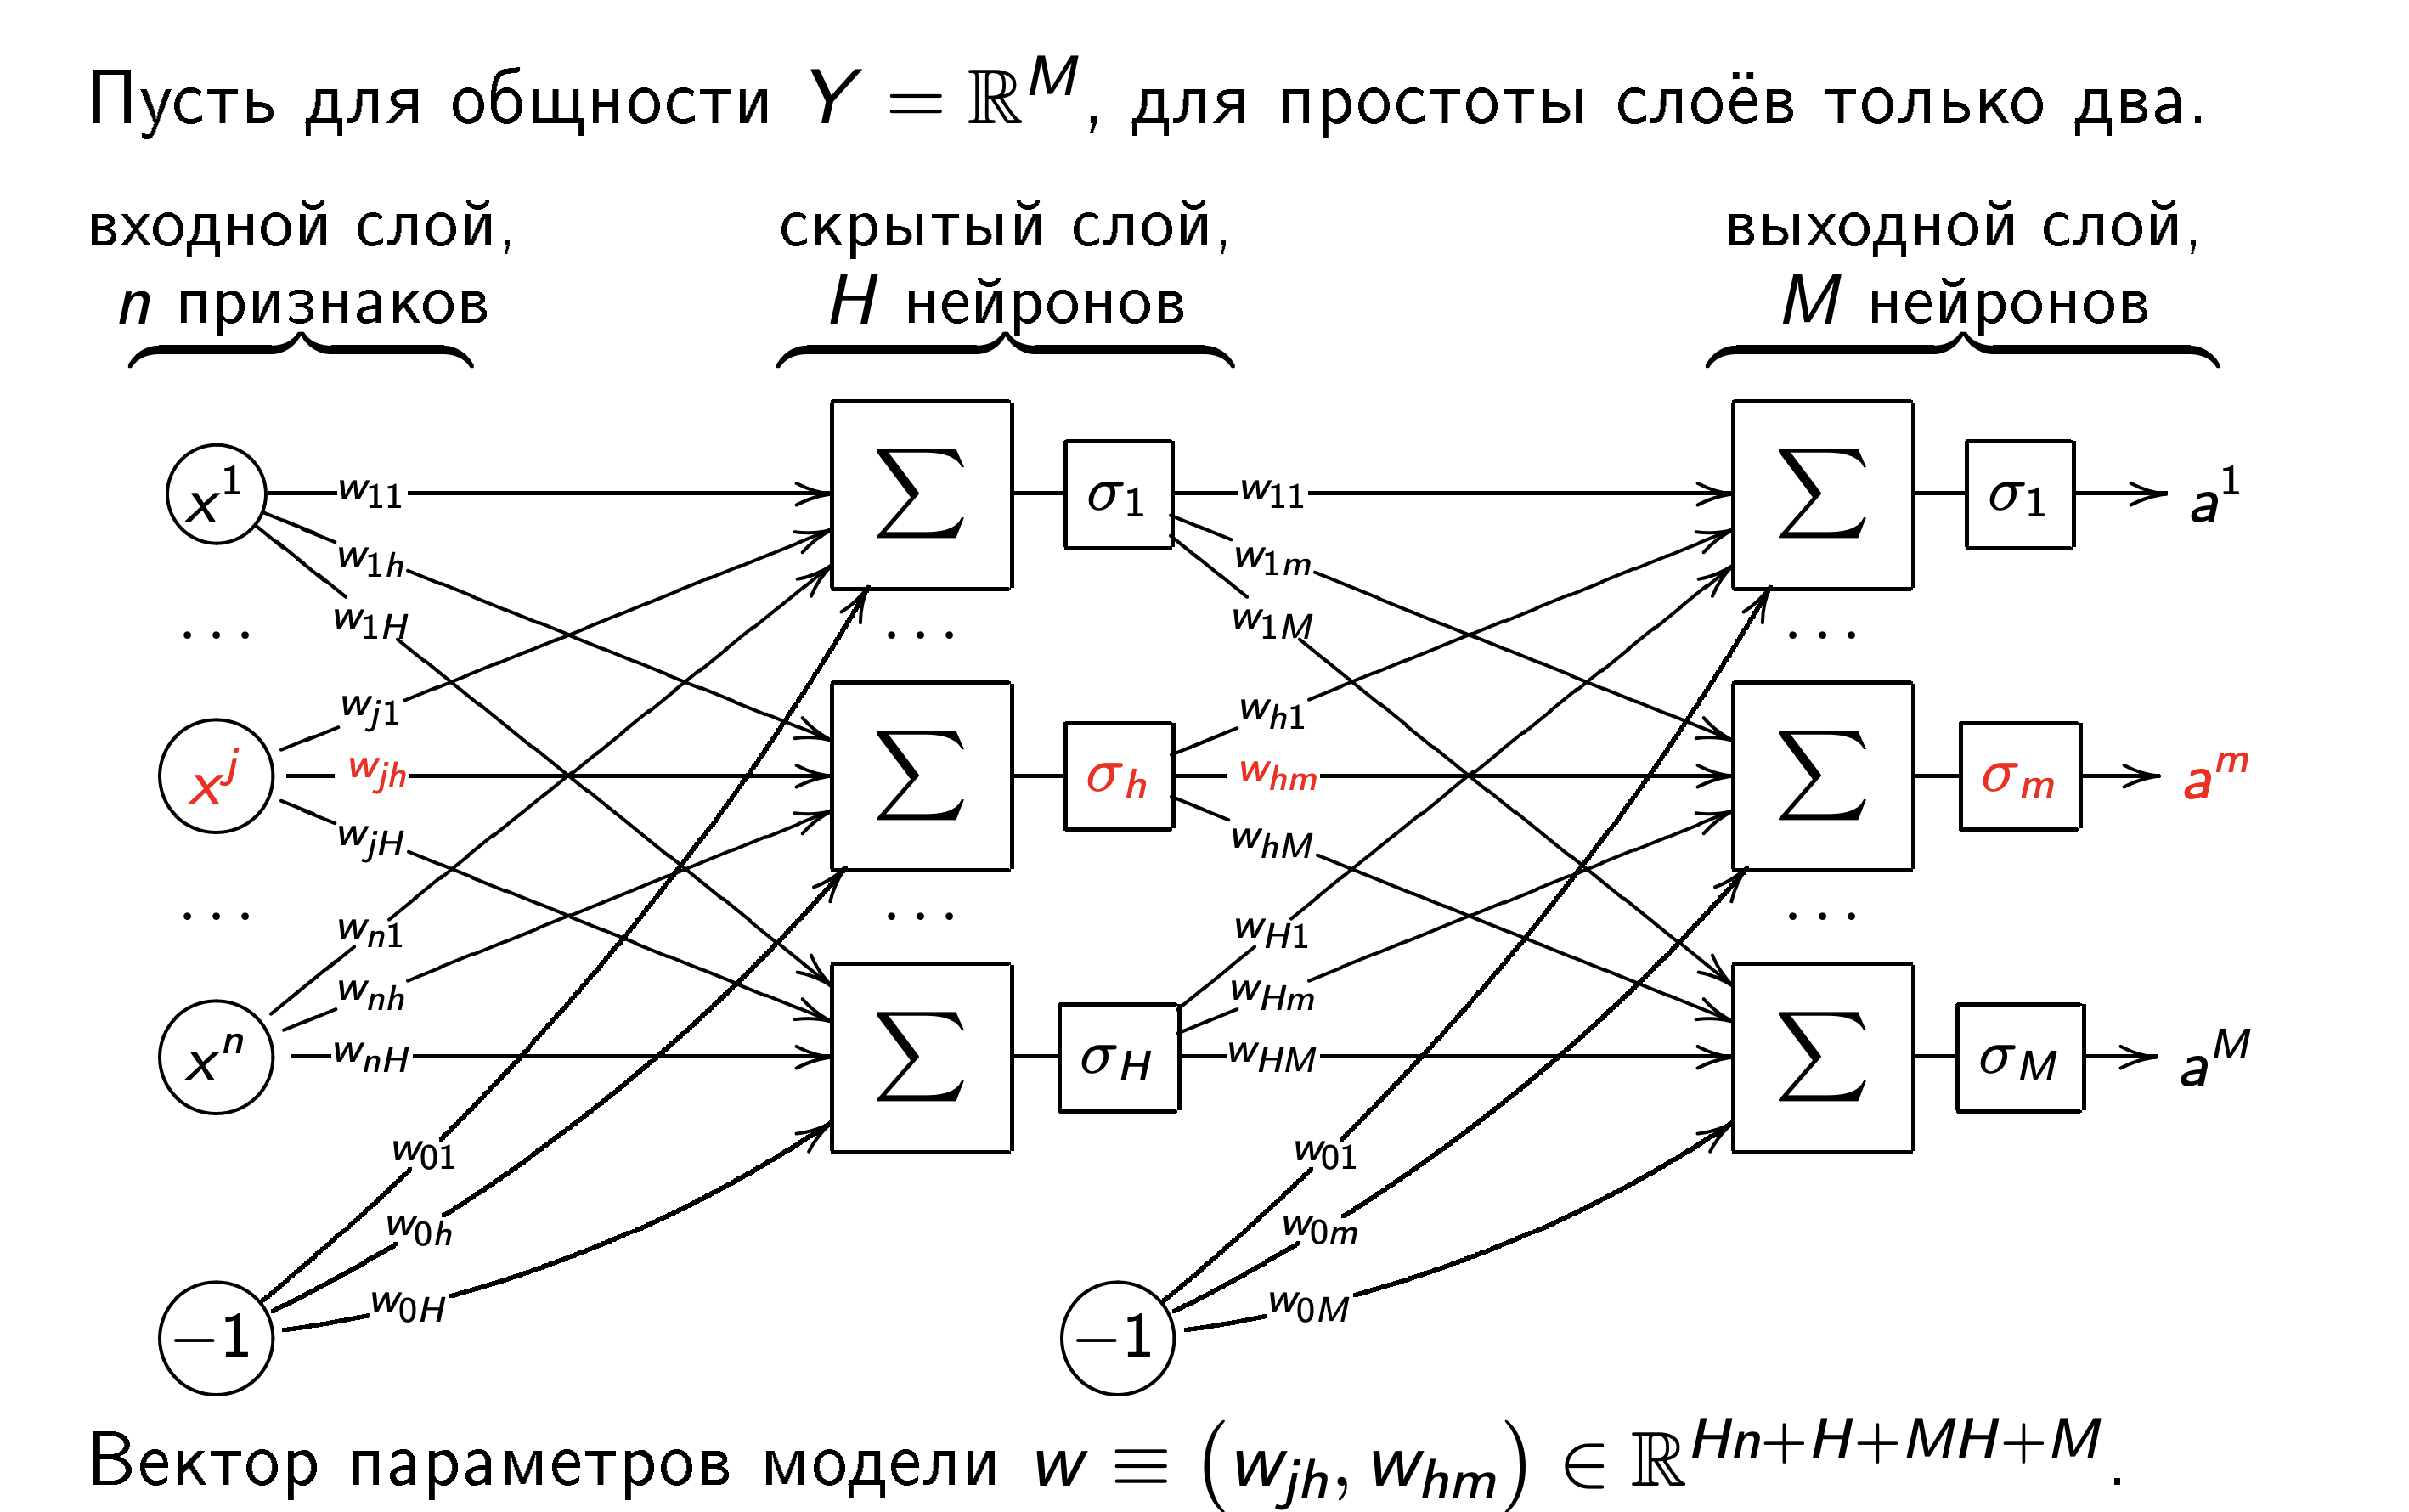

In [4]:
Image('images/1.png', width = 600)

Мы собираемся искать параметры **градиентным спуском**. Какая будет ассимптотика данного алгоритма?

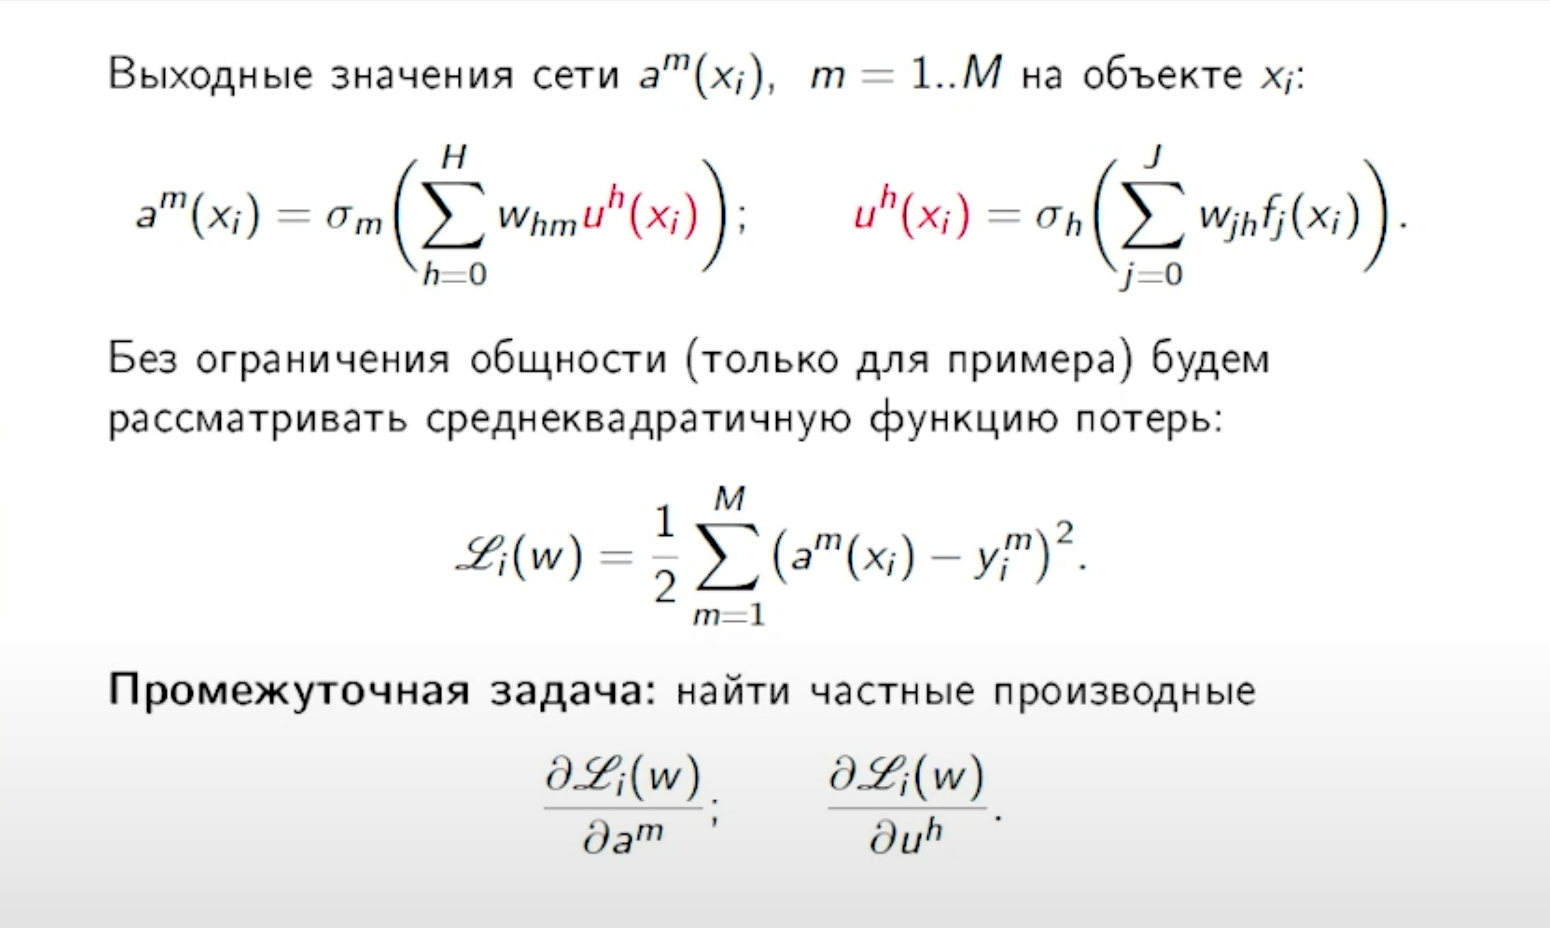

In [5]:
Image('images/2.png', width=600)

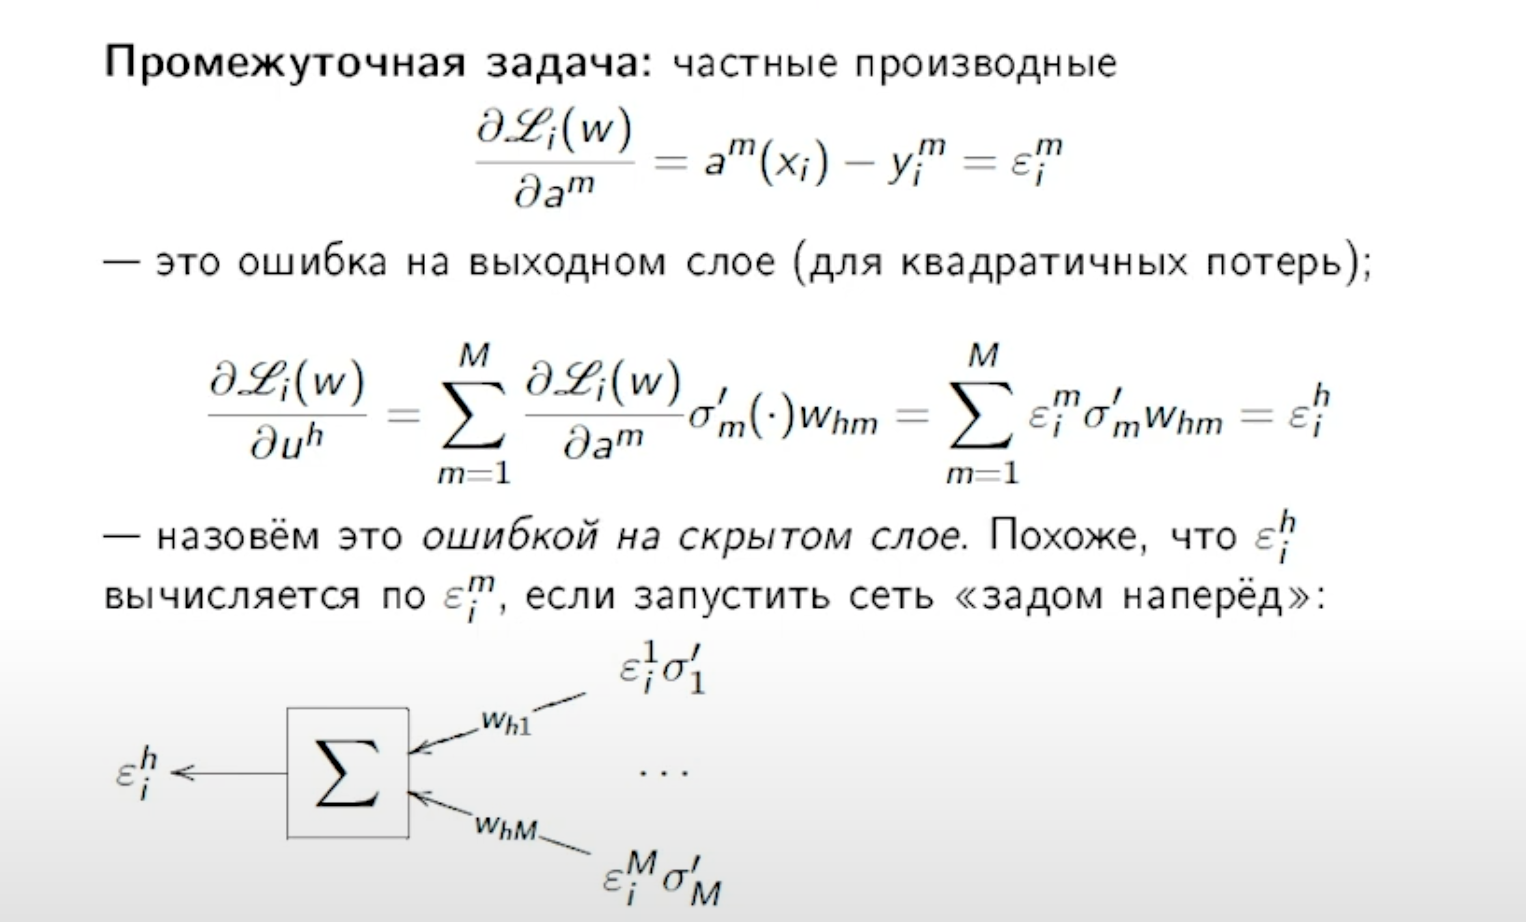

In [6]:
Image('images/3.png', width=600)

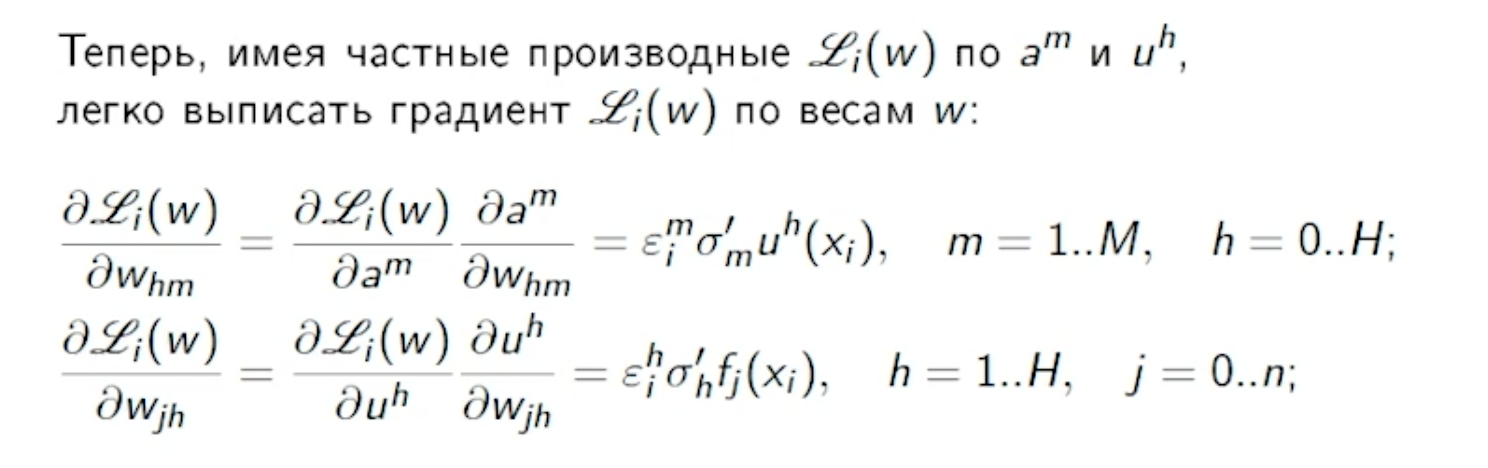

In [7]:
Image('images/4.png', width=600)

## 7.3 Алгоритм обратного распространения ошибки

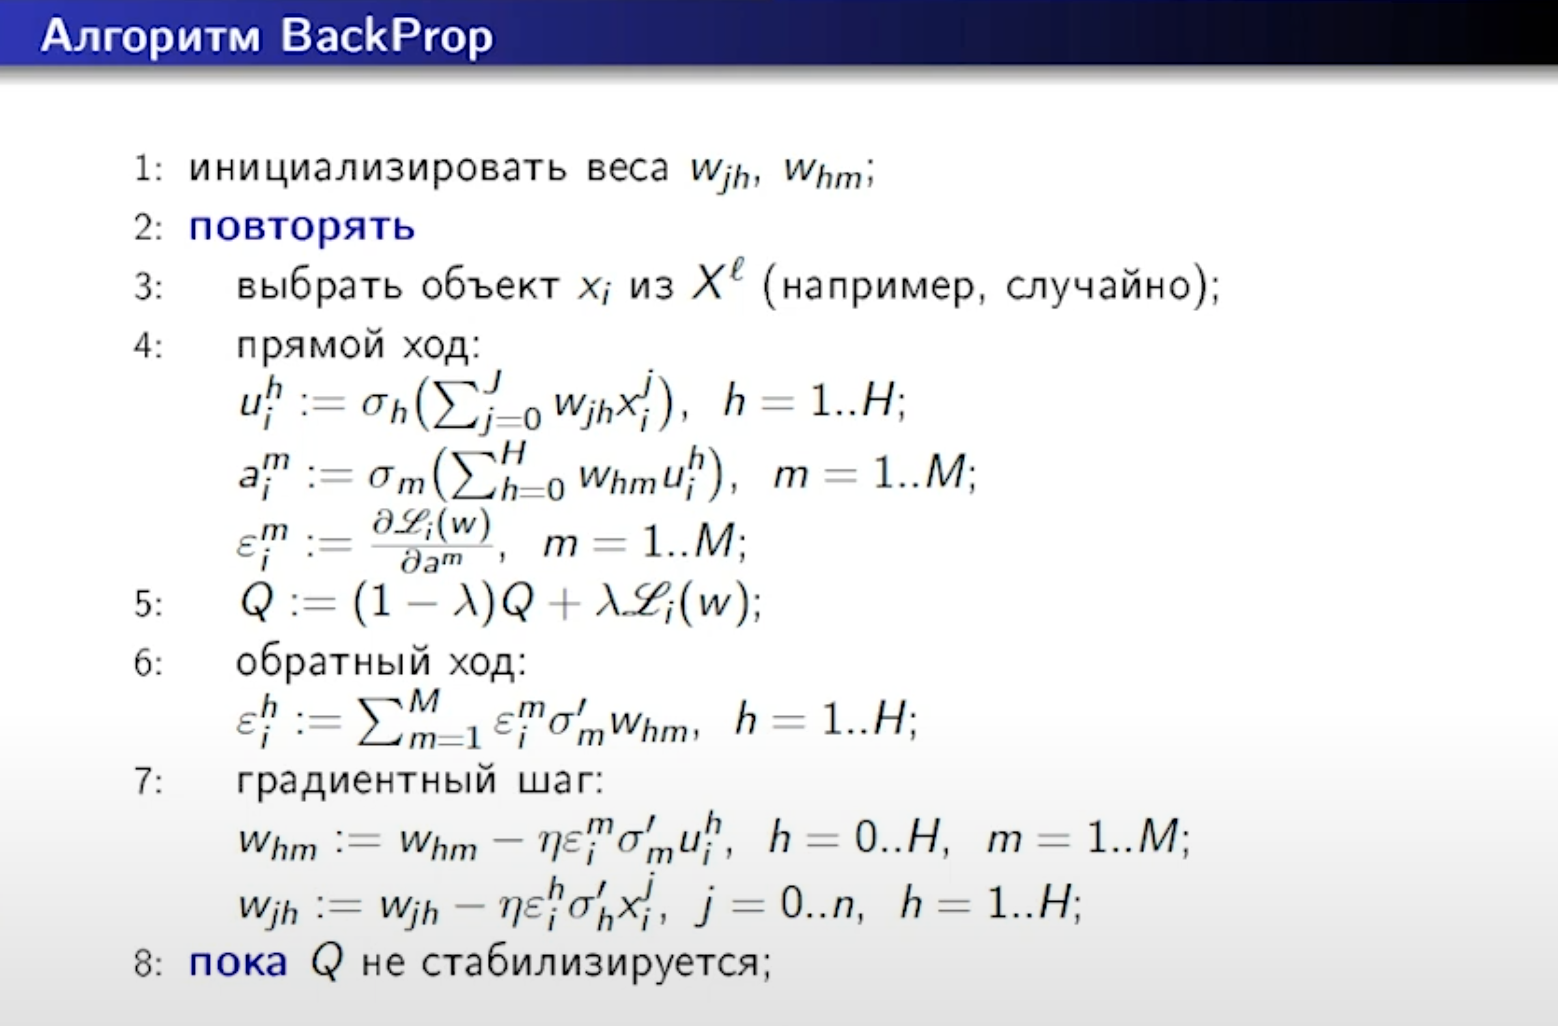

In [8]:
Image('images/5.png', width=600)

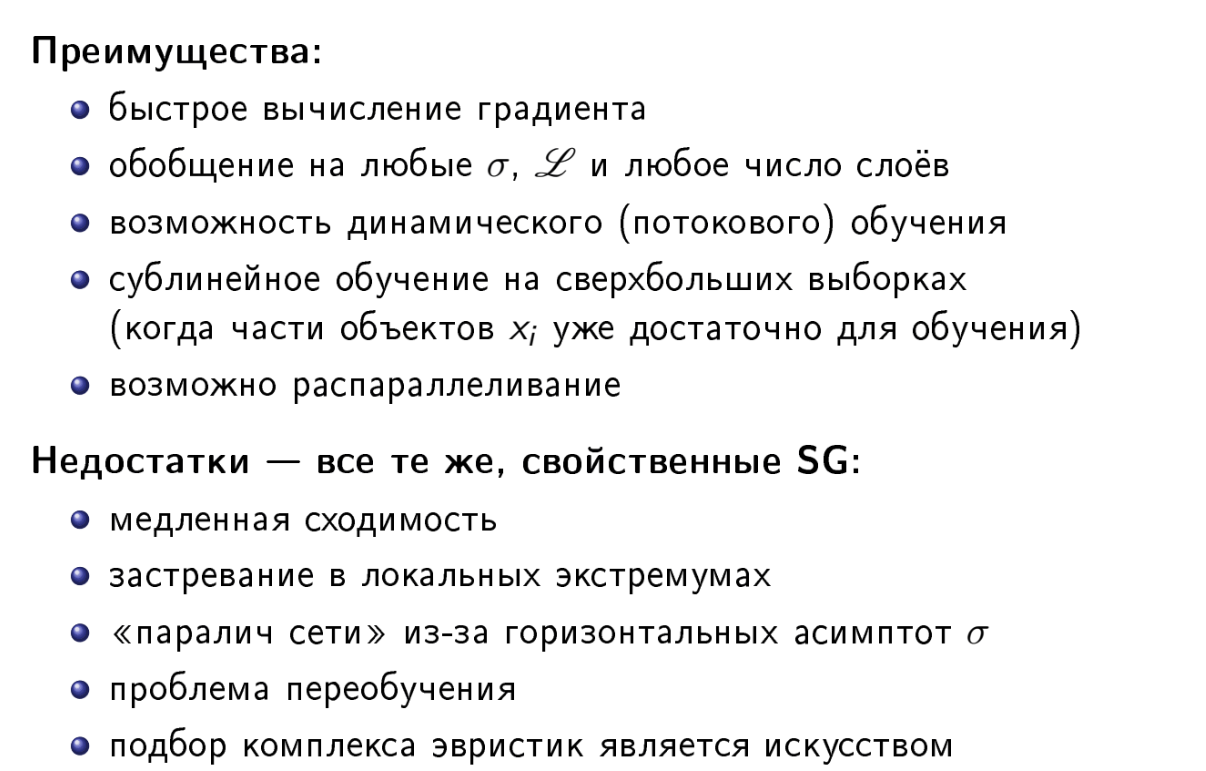

In [19]:
Image('images/plusmin.png', width=600)

99 0.1770576685667038
199 0.06904708594083786
299 0.007453989237546921
399 0.004652933683246374
499 0.004507944919168949
599 0.0075875637121498585
699 0.005198363680392504
799 0.0049528274685144424
899 0.005013144109398127
999 0.004780896473675966
1099 0.004588604439049959
1199 0.004491198807954788
1299 0.004446065053343773
1399 0.004425539169460535
1499 0.004416234791278839
1599 0.004412034060806036
1699 0.004410139750689268
1799 0.004409288056194782
1899 0.004408902022987604
1999 0.004408731125295162


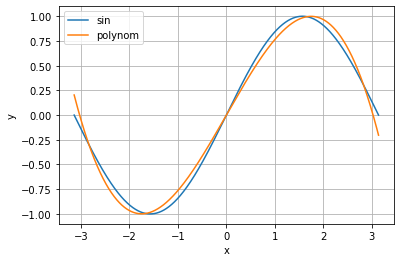

In [3]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Sigmoid(),
    torch.nn.Linear(3, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-2
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

# Рассмотрим параметры сети

In [4]:
for param in model.parameters():
    print(param.grad)

tensor([[ 6.2461e-04, -2.8811e-05,  4.3872e-03],
        [-8.0978e-05,  3.7397e-06, -5.6879e-04],
        [-8.1770e-04,  3.7713e-05, -5.7437e-03]])
tensor([-6.0055e-06,  7.7873e-07,  7.8625e-06])
tensor([[ 0.0003,  0.0013,  0.0004],
        [ 0.0002,  0.0007,  0.0002],
        [-0.0002, -0.0006, -0.0002]])
tensor([ 9.0469e-06,  5.1782e-06, -4.2907e-06])
tensor([[-0.0002, -0.0008, -0.0007]])
tensor([-1.2232e-05])


In [27]:
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)


# Полезные ссылки
* [Видео по алгоритму](https://www.youtube.com/watch?v=tIeHLnjs5U8)
* [Методичка Воронцова по нейронкам](http://ultra27.ccas.ru/voron/download/NeuralNets.pdf)
* [Видос Воронцова, откуда взяты слайды](https://www.youtube.com/watch?v=zbdgUZAzfQg&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=13)
* [Анимации градиентных спусков](http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html)
* [Про softmax](https://konstantinklepikov.github.io/2019/06/27/cs2131n-sofrmax.html)
* [Softmax better than Normalization](https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization)
